In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 74)
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.model_selection import learning_curve

In [75]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='unicode_escape')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

## **checking if df has null values**

In [77]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## **check if data has duplicated values**

In [78]:
df.duplicated().sum()

0

In [79]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [80]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [81]:
df['Delivery Days'] = df['Ship Date'] - df['Order Date']
df['Delivery Days'] = df['Delivery Days'].dt.days

## **Data Visualization**

##### **1. Plot Distribution of the numeric values**

In [82]:
quantity = go.Box(x=df['Quantity'],name = 'Quantity')
sales = go.Box(x=df['Sales'],name = 'Sales')
discount = go.Box(x=df['Discount'],name = 'Discount')
profit = go.Box(x=df['Profit'],name = 'Profit')

fig = make_subplots(rows = 2,cols = 2)
fig.append_trace(quantity,row=1,col=1)
fig.append_trace(sales,row=1,col=2)
fig.append_trace(discount,row=2,col=1)
fig.append_trace(profit,row=2,col=2)
fig.update_layout(
    title_text = 'Distribution of the numeric values',
    title_font_size = 30,
    title_x = .50 # position of the title
)
fig.show()

##### **2. Plot Distribution of the categorical values**

In [83]:
ship_mode = go.Histogram(x=df["Ship Mode"],name="Ship Mode",marker = {'color':'gray'})
segment = go.Histogram(x=df["Segment"],name="Segment",marker = {'color':'yellow'})
Region = go.Histogram(x=df["Region"],name="Region",marker = {'color':'purple'})
category = go.Histogram(x=df["Category"],name="Category",marker = {'color':'bisque'})

fig = make_subplots(rows=2, cols=2)
fig.append_trace(ship_mode, row = 1, col = 1)
fig.append_trace(segment, row = 1, col = 2)
fig.append_trace(Region, row = 2, col = 1)
fig.append_trace(category, row = 2, col = 2)
fig.update_layout(
    title_text = 'Number of each category in the categorical variables',
    title_x=0.45
)

fig.show()


#### **3.Top Earning Years**

In [84]:
grouped_df = df.groupby('Year')['Profit'].sum().reset_index()

# Create a bar plot using Plotly graph_objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped_df['Year'],
    y=grouped_df['Profit'],
    text=grouped_df['Profit'].apply(lambda x : '{:,.0f}'.format(x)),  # Add text labels on the bars
    textposition='outside',  # Auto-position the text labels
   marker=dict(color=grouped_df['Profit'], colorscale='algae')
))

fig.update_layout(
    title='Total Profit per Year',
    xaxis_title='Year',
    yaxis_title='Total Profit',
    xaxis=dict(tickmode='array', tickvals=list(grouped_df['Year']), ticktext=list(grouped_df['Year']))
)

fig.show()

#### **4. Sales per Year**

In [85]:
groubed = df.groupby('Year')['Sales'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(
    x = groubed['Year'],
    y = groubed['Sales'],
    text = groubed['Sales'].apply(lambda x: '{:,.0f}'.format(x)),
    textposition = 'outside',
    marker=dict(color=groubed['Sales'], colorscale='turbid')
))
fig.update_layout(
    title = 'Total Sales per Year',
    xaxis_title = 'Year',
    yaxis_title = 'Sales',
    xaxis=dict(tickmode='array', tickvals=list(groubed['Year']), ticktext=list(groubed['Year']))
)
fig.show()

In [86]:
grouped = df.groupby('Month')['Profit'].sum().reset_index()

# Sort the DataFrame by 'Profit' in descending order
grouped = grouped.sort_values(by='Profit', ascending=False)

# Create a bar chart using Plotly graph_objects
fig = go.Figure()

fig.add_trace(go.Bar(
    x=grouped['Month'],
    y=grouped['Profit'],
    text=grouped['Profit'].apply(lambda x: '{:,.0f}'.format(x)),
    textposition='outside',
   marker=dict(color=grouped['Profit'], colorscale='tealgrn')
))

fig.update_layout(
    title='Total Profit per Months',
    xaxis_title='Months',
    yaxis_title='Profit',
    xaxis=dict(tickmode='array', tickvals=list(grouped['Month']), ticktext=list(grouped['Month']))
)

fig.show()

In [87]:
grouped = df.groupby('Month')['Sales'].sum().reset_index()
grouped = grouped.sort_values(by = 'Sales' , ascending = False)

fig = go.Figure()
fig.add_trace(go.Bar(
    x = grouped['Month'],
    y = grouped['Sales'],
    text = grouped['Sales'].apply(lambda x : '{:,.0f}'.format(x)),
    textposition = 'outside',
    marker=dict(color=grouped['Sales'], colorscale='reds')
))
fig.update_layout(
    title = 'Total Sales per Months',
    xaxis_title = 'Months',
    yaxis_title = 'Sales',
    xaxis = dict(tickmode = 'array',tickvals = list(grouped['Month']),ticktext = list(grouped['Month']))

)
fig.show()

In [88]:
grouped = df.groupby('Ship Mode')['Profit'].mean().reset_index()
grouped = grouped.sort_values(by = 'Profit' ,ascending = False)
fig = go.Figure(go.Bar(
    x = grouped['Ship Mode'],
    y = grouped['Profit'],
    text = grouped['Profit'].apply(lambda x : '{:,.0f}'.format(x)),
    textposition = 'outside',
    marker = dict(color = grouped['Profit'],colorscale = 'brwnyl')
))

fig.update_layout(
    title = 'AVG Profit per Ship Mode',
    xaxis_title = 'Ship Mode',
    yaxis_title = 'Profit',
    xaxis = dict(tickmode = 'array',tickvals = list(grouped['Ship Mode']),ticktext = list(grouped['Ship Mode']))
)
fig.show()

In [89]:
grouped = df.groupby('Ship Mode')['Sales'].mean().reset_index()
grouped = grouped.sort_values(by = 'Sales' ,ascending = False)
fig = go.Figure(go.Bar(
    x = grouped['Ship Mode'],
    y = grouped['Sales'],
    text = grouped['Sales'].apply(lambda x : '{:,.0f}'.format(x)),
    textposition = 'outside',
    marker = dict(color = grouped['Sales'],colorscale = 'fall')
))

fig.update_layout(
    title = 'AVG Sales per Ship Mode',
    xaxis_title = 'Ship Mode',
    yaxis_title = 'Sales',
    xaxis = dict(tickmode = 'array',tickvals = list(grouped['Ship Mode']),ticktext = list(grouped['Ship Mode']))
)
fig.show()

In [90]:
top_10_customers = df.groupby('Customer Name')['Quantity'].sum().reset_index()
top_10_customers = top_10_customers.sort_values(by  = 'Quantity',ascending = False).head(10)
top_10_customers

,Customer Name,Quantity
391,Jonathan Doherty,150
787,William Brown,146
387,John Lee,143
595,Paul Prost,138
713,Steven Cartwright,133
259,Emily Phan,124
145,Chloris Kastensmidt,122
133,Cassandra Brandow,122
249,Edward Hooks,120
502,Matt Abelman,117


In [91]:
fig = px.scatter(
    top_10_customers,
    x='Quantity',
    y='Customer Name',
    color='Quantity',
    size='Quantity',
    title='Top 10 Customer Quantity',
    color_continuous_scale='viridis',
    template='seaborn',
    height=500
)

fig.show()

In [92]:
least_10_customers = df.groupby('Customer Name')['Quantity'].sum().reset_index()
least_10_customers = least_10_customers.sort_values(by  = 'Quantity',ascending = False).tail(10)
least_10_customers

,Customer Name,Quantity
570,Nicole Brennan,7
37,Anemone Ratner,6
584,Patricia Hirasaki,6
123,Carl Jackson,5
625,Ricardo Emerson,5
737,Thais Sissman,4
648,Roland Murray,4
455,Lela Donovan,3
378,Jocasta Rupert,3
53,Anthony O'Donnell,2


In [93]:
fig = px.scatter(
    least_10_customers,
    x='Quantity',
    y='Customer Name',
    color='Quantity',
    size='Quantity',
    title='Top 10 Customer Quantity',
    color_continuous_scale='icefire',
    template='seaborn',
    height=500
)

fig.show()

In [94]:
top_7 = df.groupby('City')['Customer ID'].count().reset_index()
top_7 = top_7.sort_values(by = 'Customer ID',ascending = False).head(7)

In [95]:
import plotly.express as px
custom_colors = px.colors.qualitative.Pastel
fig = px.pie(
    top_7,
    values='Customer ID',
    names='City',
    title='Distribution of Customers Among The Top 7 Cities',
    template='seaborn',
    color_discrete_sequence=custom_colors
)

fig.show()

In [96]:
a = df.groupby('Sub-Category')['Profit'].sum().reset_index()
a = a.sort_values(by = 'Profit',ascending = False).head(10)
a = pd.DataFrame(a)

In [97]:
fig = px.scatter(

    a,
    x = a['Sub-Category'],
    y = a['Profit'],
    size='Profit',  # Size of the bubble is based on the 'Revenue' column
    color='Sub-Category',
    hover_name='Sub-Category',  # Display city name on hover
    title='Bubble Chart Example',
    labels={'Sub-Category': 'Sub-Category', 'Profit': 'Profit'},
    template='plotly_dark'
)

fig.show()

In [98]:
x = df.groupby('Sub-Category')['Sales'].sum().reset_index()
x = x.sort_values(by = 'Sales',ascending = False).head(10)
x = pd.DataFrame(x)
x

,Sub-Category,Sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


In [99]:
fig = px.scatter(

    x,
    x = x['Sub-Category'],
    y = x['Sales'],
    size='Sales',  # Size of the bubble is based on the 'Revenue' column
    color='Sub-Category',
    hover_name='Sub-Category',  # Display city name on hover
    title='Bubble Chart Example',
    labels={'Sub-Category': '', 'Sales': 'Sales'},
    template='plotly_white'
)

fig.show()

In [100]:
bar_color = ['mediumvioletred']
fig = px.bar(
    df['Delivery Days'].value_counts().reset_index(),
    x='index',
    y='Delivery Days',
    labels={'index': 'Delivery Days', 'Delivery Days': 'Count'},
    title='Count Plot of Delivery Days',
    template='plotly_white',
    color_discrete_sequence = bar_color
)

fig.update_layout(xaxis_title='Delivery Days', yaxis_title='Count')
fig.show()

In [101]:
box_fig = px.box(df, x='Ship Mode', y='Delivery Days', color='Ship Mode')
box_fig.update_layout(title="Impact of Ship Mode on Delivery Days",title_x=0.45,width=1300,title_font=dict(size=24, family="Arial", color="black"))
box_fig.show()

In [102]:
custom_colors =['darkred', 'darkslategrey', 'lightblue']
q = df.groupby('Segment')['Sales'].mean().reset_index()
fig = px.pie(q, names='Segment', values='Sales', title='Pie Plot of Categories',color_discrete_sequence=custom_colors)

fig.show()

In [103]:
grouped = df.groupby(['Year','Month'])['Sales'].sum().reset_index()

In [104]:
custom_colors = px.colors.qualitative.Set1
fig = px.area(grouped, x='Month', y='Sales', color='Year',
              labels={'Year': 'Year', 'Month': 'Month', 'Sales': 'Total Sales'},
              color_discrete_sequence= custom_colors)

fig.update_layout(
    height=600, width=1300,
    title_text = 'Distribution of Sales per month ',
    title_x=0.45,title_font=dict(size=20),
    xaxis =dict(tickmode='array', tickvals=list(grouped['Month']), ticktext=list(grouped['Month']))
)

fig.show()

In [105]:
grouped = df.groupby(['Year','Month'])['Profit'].sum().reset_index()
custom_colors = px.colors.qualitative.Dark2
fig = px.area(grouped, x='Month', y='Profit', color='Year',
              labels={'Year': 'Year', 'Month': 'Month', 'Sales': 'Total Sales'},
              color_discrete_sequence= custom_colors)

fig.update_layout(
    height=600, width=1300,
    title_text = 'Distribution of Sales per month ',
    title_x=0.45,title_font=dict(size=20),
    xaxis =dict(tickmode='array', tickvals=list(grouped['Month']), ticktext=list(grouped['Month']))
)

fig.show()

In [106]:
fig = px.violin(df, x="Sub-Category",y='Sales',color="Category")
fig.show()

In [107]:
grouped = df.groupby('Region')['Sales'].sum().reset_index()
fig = px.bar(
    grouped,
    x = 'Region',
    y = 'Sales',
    labels={'Values': 'Sales', 'Category': 'Region'},
    title='Sales per Region',
    color_discrete_sequence = ['rebeccapurple'],
    text = grouped['Sales'].apply(lambda x : '{:,.0f}'.format(x))
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

In [108]:
grouped = df.groupby('Region')['Profit'].sum().reset_index()
fig = px.bar(
    grouped,
    x = 'Region',
    y = 'Profit',
    labels={'Values': 'Profit', 'Category': 'Region'},
    title='Sales per Region',
    color_discrete_sequence = ['darkseagreen'],
    text = grouped['Profit'].apply(lambda x : '{:,.0f}'.format(x))
)
fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.show()

## **Data Preprocessing**

In [109]:
df.drop(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Country', 'Postal Code',
           'Region', 'Product ID', 'Product Name','Order Date'], axis=1, inplace=True)

In [110]:
## encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
  if df.dtypes[i] == 'object':
    df[i] = le.fit_transform(df[i])


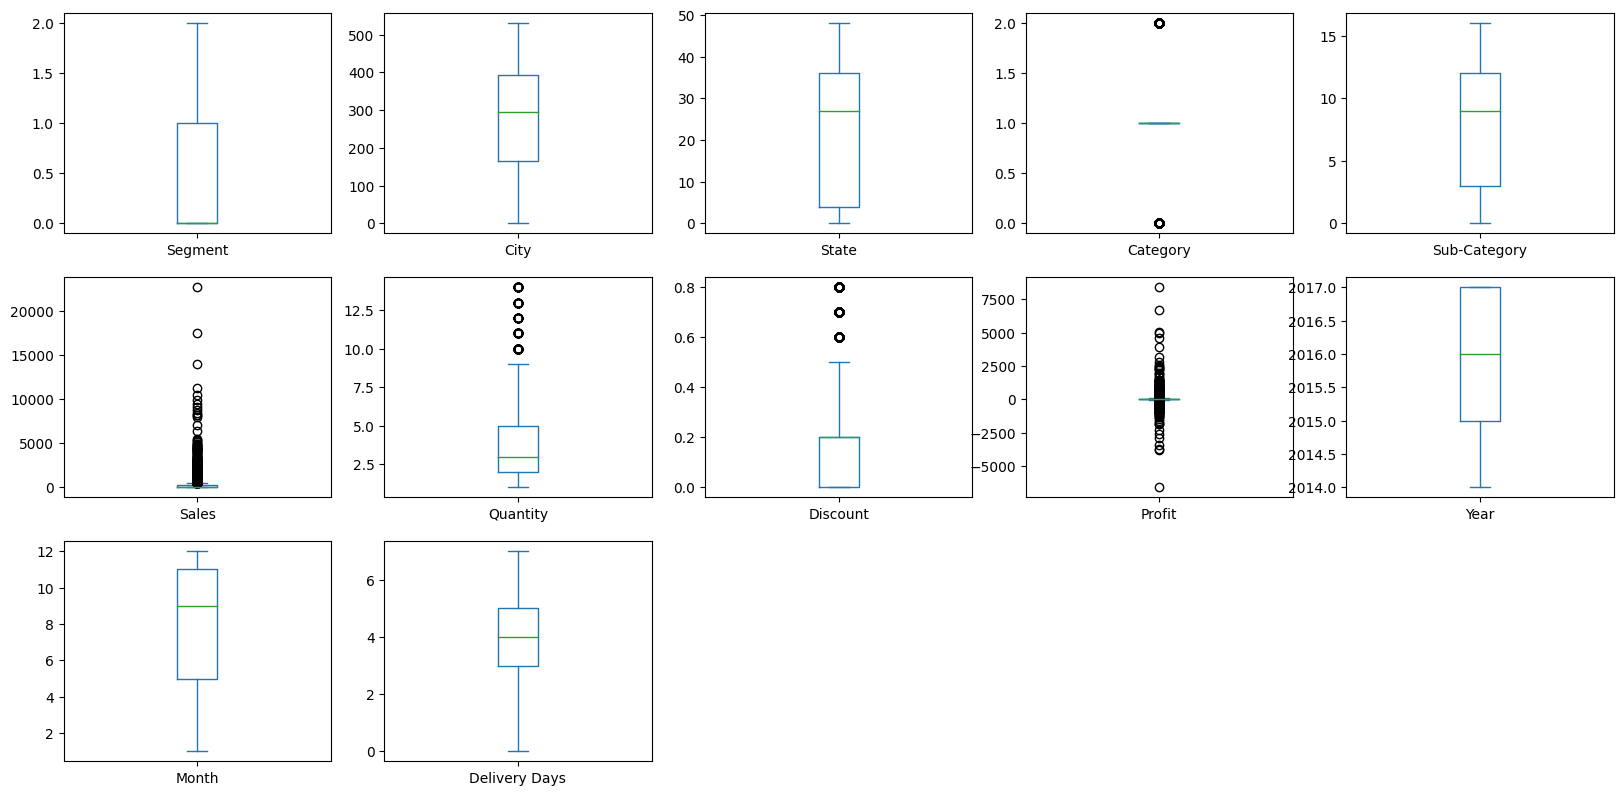

In [111]:
## representing the outliers
df.plot(kind = 'box', subplots = True, figsize = (20,20),layout = (6,5))
plt.show()

In [112]:
# df.drop(df[df['Sales'] > 3500].index,inplace = True)
# df.drop(df[df['Quantity'] > 10 ].index,inplace = True)
# df.drop(df[df['Discount'] > 0.5].index,inplace = True)
# df.drop(df[df['Profit'] > 1000 | df['Profit'] < -500].index,inplace = True)
df.drop(index= df[(df['Sales'] > 3000)].index, inplace=True)
df.drop(index= df[(df['Profit'] > 1000) | (df['Profit'] < -500)].index, inplace=True)
df.drop(index= df[(df['Discount'] >= 0.6)].index, inplace=True)
df.drop(index= df[(df['Quantity'] > 11)].index, inplace=True)

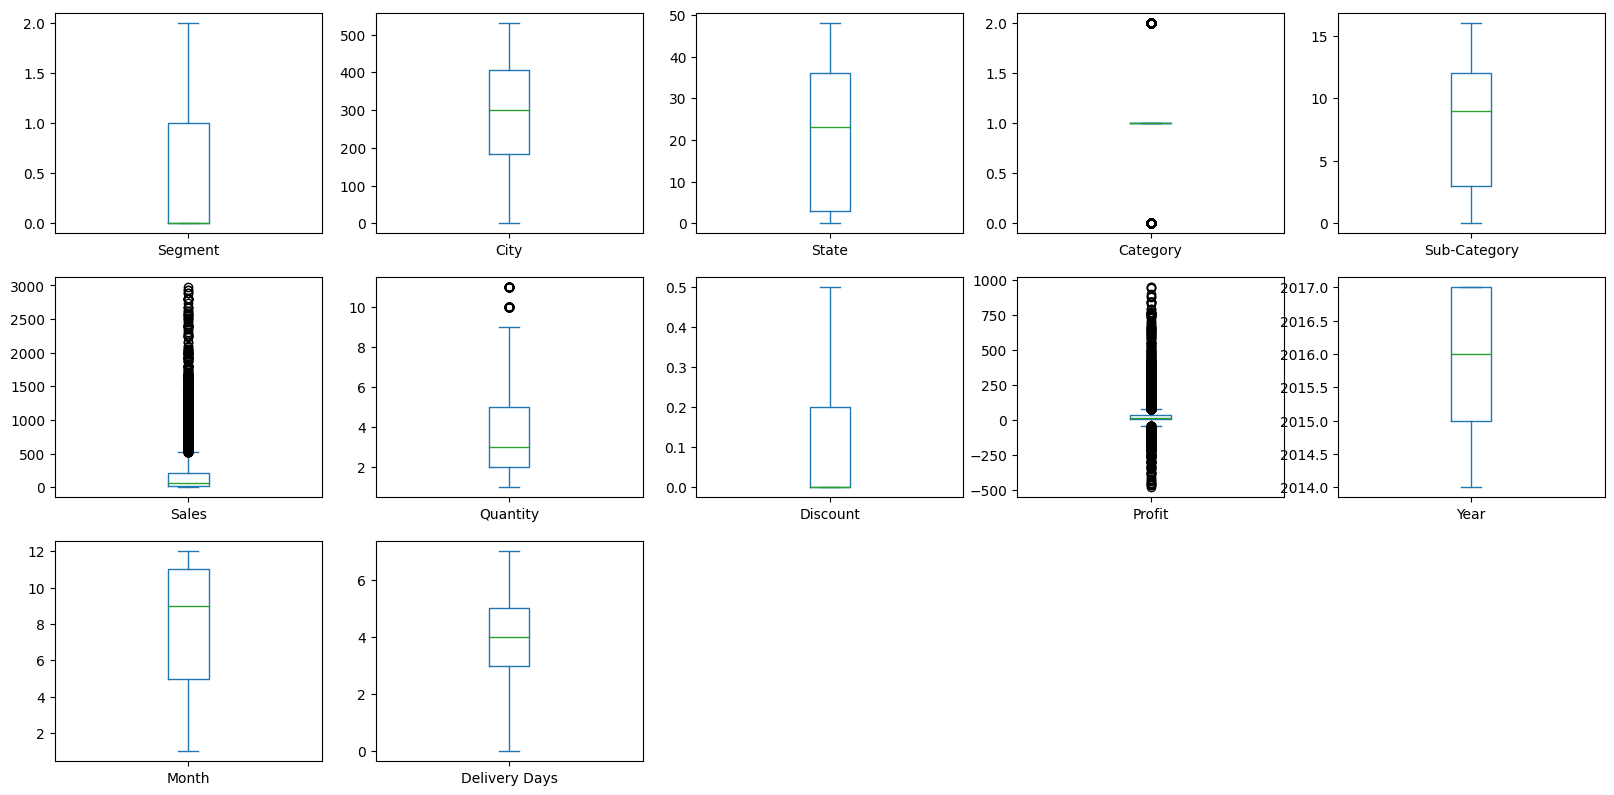

In [113]:
## representing the outliers
df.plot(kind = 'box', subplots = True, figsize = (20,20),layout = (6,5))
plt.show()

In [114]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = df.drop('Sales',axis = 1).values
y = df['Sales'].values

In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
import catboost
from catboost import CatBoostRegressor
import xgboost as xgb
import lightgbm as lgb

In [209]:
# Grid Search
from sklearn.model_selection import ShuffleSplit
lgb_model = lgb.LGBMRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth ' : [3,4,5,6]
}
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=cv)
grid_search.fit(x, y)

# Print best parameters from grid search
# print("Best Parameters:", grid_search.best_params_)

lgb_model = lgb.LGBMRegressor(**best_params)
# Cross-validation
score_lgb = cross_val_score(lgb_model, x, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", score_lgb)
print("Best Parameters:", grid_search.best_params_)


[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 3
[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 3
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 6290, number of used features: 11
[LightGBM] [Info] Start training from score 204.321053
[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 3
[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: 3
[LightGBM] [Warning] max_depth is 

In [210]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor()
# Grid Search
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2,0.3,0.4],
    'max_depth' : [3,5,6,7],
    'min_child_weight' : [1,2,3,4]
}
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv)
grid_search.fit(x, y)

# Print best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Cross-validation
xgb_model = xgb.XGBRegressor(**best_params)
score_xgb = cross_val_score(xgb_model, x, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores :", score_xgb)





Streaming output truncated to the last 5000 lines.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:03:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:03:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:03:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:03:04] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:03:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "iterations" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[15:03:05] W

Best Parameters: {'iterations': 50, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 4}
Cross-Validation Scores : [0.82911828 0.8179308  0.82319993 0.84715192 0.80927093]


In [211]:
import catboost
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor()
# Grid Search
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth' : [4,5,6,7]
}
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=cv)
grid_search.fit(x, y)

# Print best parameters from grid search
print("Best Parameters:", grid_search.best_params_)

# Cross-validation
catboost_model = CatBoostRegressor(**best_params)
score_cat = cross_val_score(catboost_model, x, y, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores :", score_cat)



Streaming output truncated to the last 5000 lines.
2:	learn: 260.9726105	total: 3.49ms	remaining: 229ms
3:	learn: 242.1513981	total: 4.86ms	remaining: 238ms
4:	learn: 228.2732340	total: 6.02ms	remaining: 235ms
5:	learn: 216.2752737	total: 7.2ms	remaining: 233ms
6:	learn: 206.5429418	total: 8.57ms	remaining: 236ms
7:	learn: 199.2212091	total: 9.95ms	remaining: 239ms
8:	learn: 192.7439674	total: 11.4ms	remaining: 241ms
9:	learn: 187.3973230	total: 12.8ms	remaining: 243ms
10:	learn: 182.9771202	total: 13.9ms	remaining: 239ms
11:	learn: 178.2543245	total: 15.7ms	remaining: 245ms
12:	learn: 176.0230057	total: 17.1ms	remaining: 247ms
13:	learn: 172.6636242	total: 18.3ms	remaining: 244ms
14:	learn: 169.7809420	total: 19.8ms	remaining: 244ms
15:	learn: 167.4389177	total: 21.4ms	remaining: 246ms
16:	learn: 165.1860238	total: 22.8ms	remaining: 245ms
17:	learn: 163.0406418	total: 24.2ms	remaining: 245ms
18:	learn: 162.3406707	total: 25.7ms	remaining: 244ms
19:	learn: 160.4376400	total: 27.1ms	rem

In [212]:
print(score_cat.mean())
print(score_lgb.mean())
print(score_xgb.mean())

0.8398994613811789
0.8348011983637289
0.825334373323414


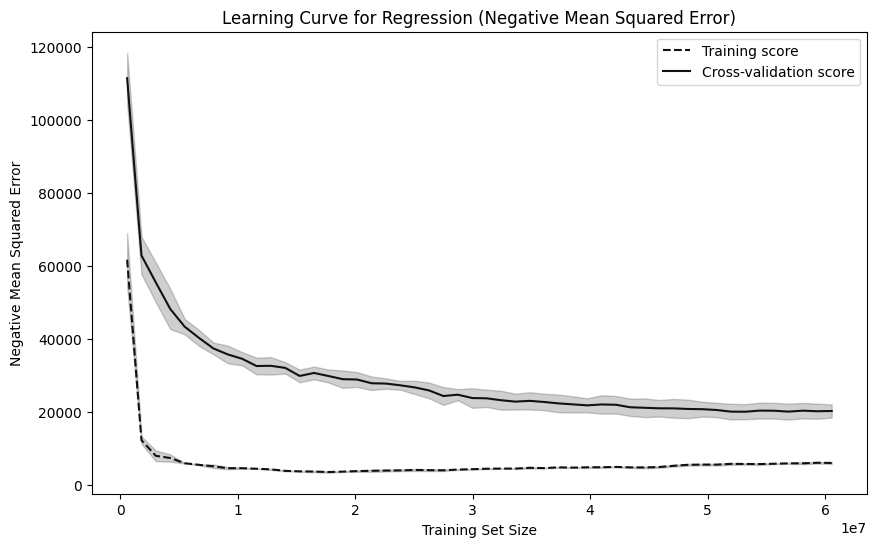

In [213]:
train_sizes, train_scores, test_scores = learning_curve(
    lgb_model, x, y, cv=4, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50)
)

# Calculate mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * len(x), train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes * len(x), test_mean, color="#111111", label="Cross-validation score")

# Fill the area around the lines to represent the variability
plt.fill_between(train_sizes * len(x), train_mean - train_std, train_mean + train_std, alpha=0.2, color="#111111")
plt.fill_between(train_sizes * len(x), test_mean - test_std, test_mean + test_std, alpha=0.2, color="#111111")

plt.title("Learning Curve for Regression (Negative Mean Squared Error)")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()

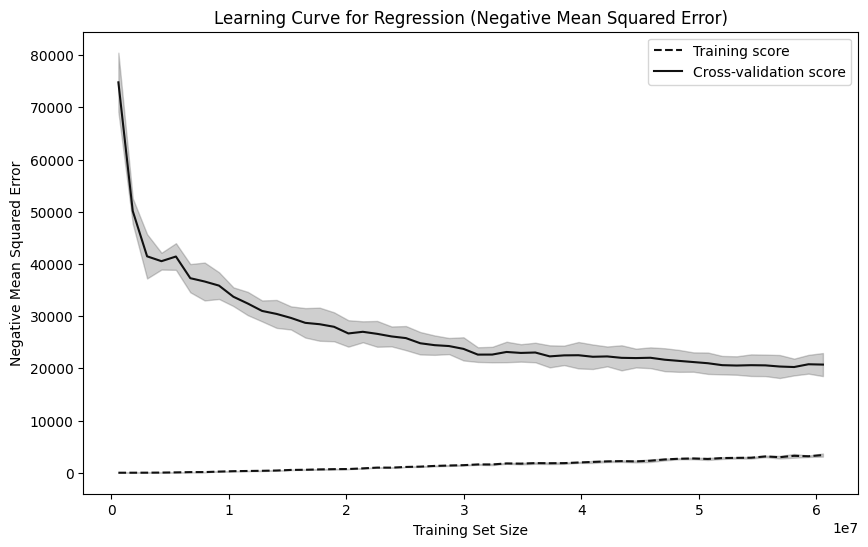

In [215]:
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, x, y, cv=4, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50)
)

# Calculate mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * len(x), train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes * len(x), test_mean, color="#111111", label="Cross-validation score")

# Fill the area around the lines to represent the variability
plt.fill_between(train_sizes * len(x), train_mean - train_std, train_mean + train_std, alpha=0.2, color="#111111")
plt.fill_between(train_sizes * len(x), test_mean - test_std, test_mean + test_std, alpha=0.2, color="#111111")

plt.title("Learning Curve for Regression (Negative Mean Squared Error)")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()

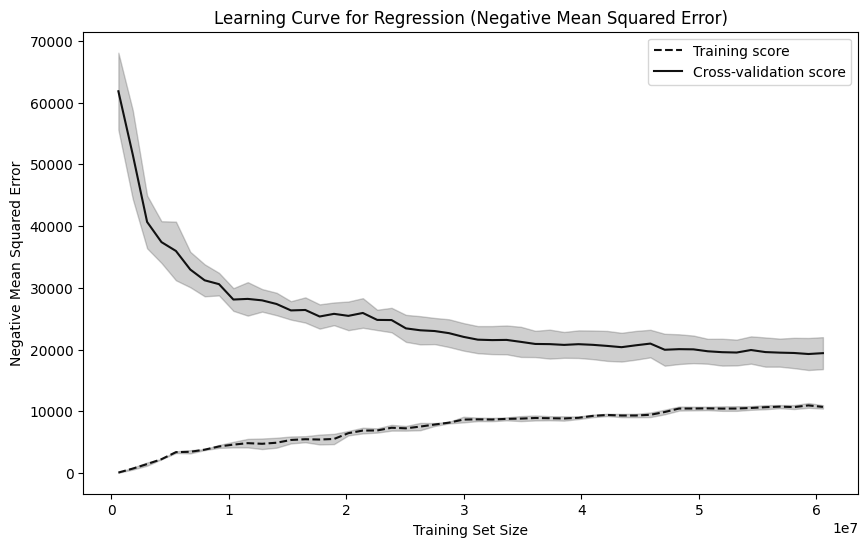

In [216]:
train_sizes, train_scores, test_scores = learning_curve(
    catboost_model, x, y, cv=4, scoring='neg_mean_squared_error', n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0, 50)
)

# Calculate mean and standard deviation of training and test scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes * len(x), train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes * len(x), test_mean, color="#111111", label="Cross-validation score")

# Fill the area around the lines to represent the variability
plt.fill_between(train_sizes * len(x), train_mean - train_std, train_mean + train_std, alpha=0.2, color="#111111")
plt.fill_between(train_sizes * len(x), test_mean - test_std, test_mean + test_std, alpha=0.2, color="#111111")

plt.title("Learning Curve for Regression (Negative Mean Squared Error)")
plt.xlabel("Training Set Size")
plt.ylabel("Negative Mean Squared Error")
plt.legend(loc="best")
plt.show()